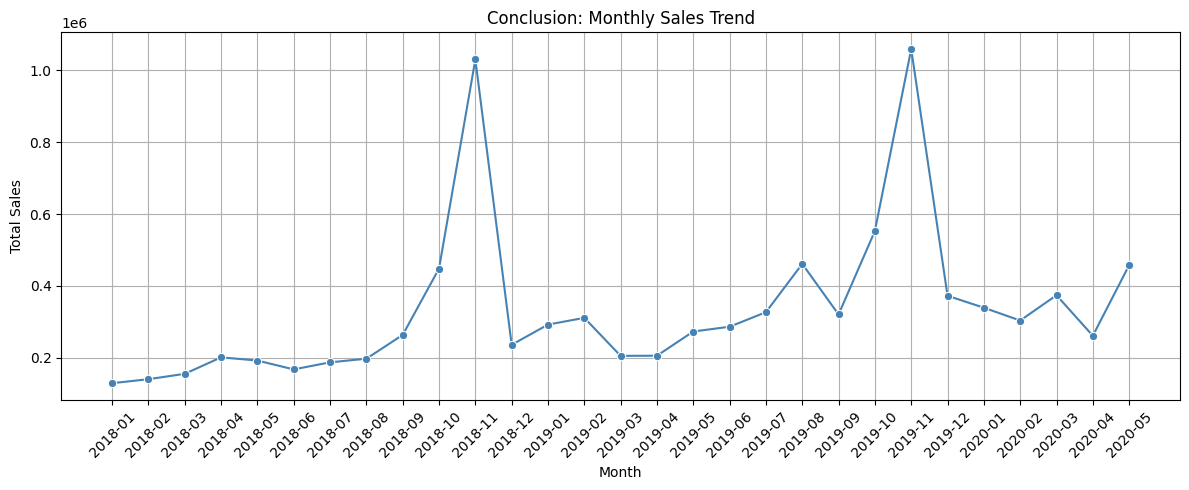

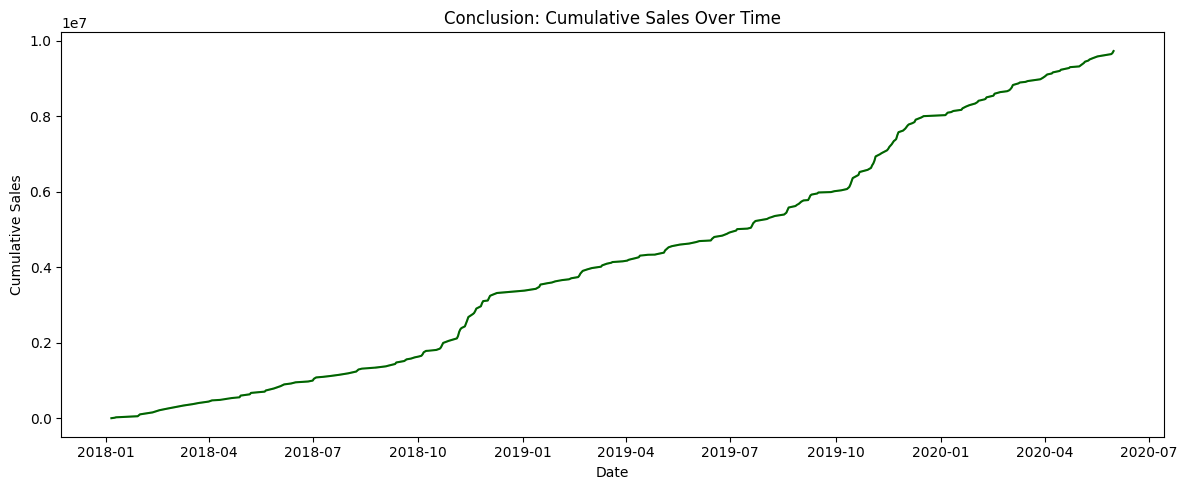

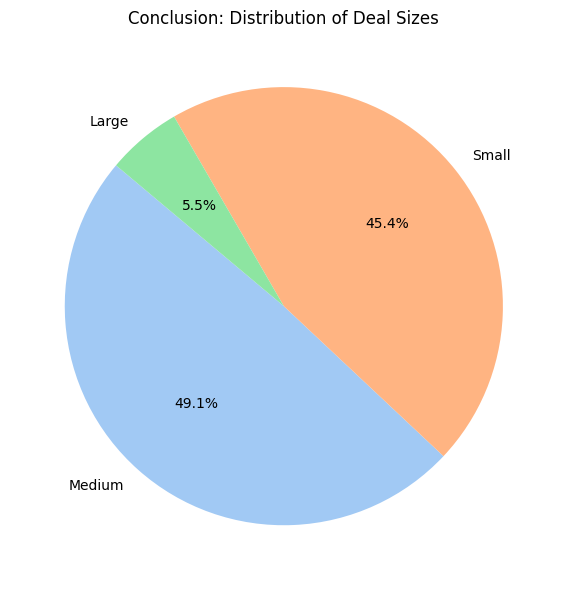

/tmp/ipykernel_112591/695982141.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, y='COUNTRY', x='SALES', palette='coolwarm')


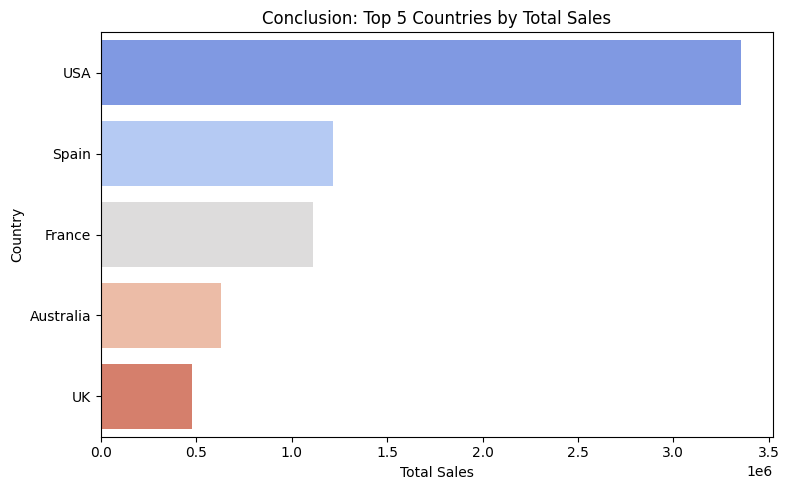

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Auto Sales data.csv")
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], dayfirst=True)
df['YEAR_MONTH'] = df['ORDERDATE'].dt.to_period('M').astype(str)

# 1. Monthly Sales Trend (summary)
monthly_sales = df.groupby('YEAR_MONTH')['SALES'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='YEAR_MONTH', y='SALES', marker='o', color='steelblue')
plt.title('Conclusion: Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Cumulative Sales Over Time
df_sorted = df.sort_values('ORDERDATE')
df_sorted['CUMULATIVE_SALES'] = df_sorted['SALES'].cumsum()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_sorted, x='ORDERDATE', y='CUMULATIVE_SALES', color='darkgreen')
plt.title('Conclusion: Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.tight_layout()
plt.show()

# 3. Sales by Deal Size (Pie Chart)
deal_size_counts = df['DEALSIZE'].value_counts()
colors = sns.color_palette('pastel')

plt.figure(figsize=(6, 6))
plt.pie(deal_size_counts, labels=deal_size_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Conclusion: Distribution of Deal Sizes')
plt.tight_layout()
plt.show()

# 4. Top 5 Countries by Sales
top_countries = df.groupby('COUNTRY')['SALES'].sum().nlargest(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=top_countries, y='COUNTRY', x='SALES', palette='coolwarm')
plt.title('Conclusion: Top 5 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
